<center> <img src=".github./images/MNIST.png" align="center"/>

# Project work for the course "TZ - Tehnologije Znanja" at UM FERI
## Classification of hand-written digits
* 60.000 digits in dataset
* 28×28 pixels
* greyscale
### Includes a comparison of different neural network nets, time taken for training and metrics
* Time
* Number of layers
* Number of epochs
* Cross-Validation
* Different Algorithms
#### Data accessible at [MNIST Image Databse](http://yann.lecun.com/exdb/mnist/)

#### Install librarires

In [1]:
#pip install tensorflow
#pip install keras
#!pip install opencv-python

#pip install python-mnist # Če bi na drugačen način nalagali podatke

## idx3 file-extension
Files are in .idx3-ubyte file

It is a simple yet efficient format to store multidimensional matrices

First read the files
* Train images are in /train directory
* Test images are in /test directory
_________________
Files:
* train-images.idx3-ubyte
* train-labels.idx1-ubyte
* t10k-images.idx3-ubyte
* t10k-labels.idx1-ubyte
_________________

EXAMPLE OF IMAGE FILE

| Offset | Type          | Value            | Description              |
|--------|---------------|------------------|--------------------------|
| 0000   | 32bit integer | 0x00000803(2051) | Magic Number (MSB first) |
| 0004   | 32bit integer | 60000            | No. of items             |
| 0008   | unsigned byte | 28               | No. of rows              |
| 00012  | unsigned byte | 28               | No. of columns           |
| 00016  |               | ??               | pixel                    |
| 00017  |               | ??               | pixel                    |
| ...    |               |                  |                          |
| xxxx   |               | ??               | pixel                    |

_________________
EXAMPLE OF LABEL FILE

| Offset | Type          | Value            | Description              |
|--------|---------------|------------------|--------------------------|
| 0000   | 32bit integer | 0x00000801(2049) | Magic Number (MSB first) |
| 0004   | 32bit integer | 60000            | No. of items             |
| 0008   | unsigned byte | ??               | label                    |
| 0009   | unsigned byte | ??               | label                    |
| ...    |               |                  | label                    |
| xxxx   |               | ??               |                          |
The labels values are 0 to 9. 

*****

The code loops through the file. First 4 variables represent (as seen from table):
* Magic Number
* Size
* No. of rows (nrows)
* No. of columns (ncols)

Every next line represents a pixel of an image - 28*28 - 784 pixels.

Label file starts the same, first two lines are:
* Magic Number
* Size

Every next line represents a label of an image, digit [0,9]

In [2]:
import numpy as np
import struct

def read_file():
    with open('train/train-images.idx3-ubyte','rb') as f:
        magic, size = struct.unpack(">II", f.read(8))
        nrows, ncols = struct.unpack(">II", f.read(8))
        train_data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
        train_data = train_data.reshape((size, nrows, ncols))

    with open('train/train-labels.idx1-ubyte', 'rb') as i:
        magic, size = struct.unpack('>II', i.read(8))
        train_data_labels = np.fromfile(i, dtype=np.dtype(np.uint8)).newbyteorder(">") 

    with open('test/t10k-images.idx3-ubyte','rb') as j:
        magic, size = struct.unpack(">II", j.read(8))
        nrows, ncols = struct.unpack(">II", j.read(8))
        test_data = np.fromfile(j, dtype=np.dtype(np.uint8).newbyteorder('>'))
        test_data = test_data.reshape((size, nrows, ncols))

    with open('test/t10k-labels.idx1-ubyte', 'rb') as k:
        magic, size = struct.unpack('>II', k.read(8))
        test_data_labels = np.fromfile(k, dtype=np.dtype(np.uint8)).newbyteorder(">") 

    return train_data, train_data_labels, test_data, test_data_labels

train_data, train_data_labels, test_data, test_data_labels = read_file() # We don't change these so we can reset them later
x_train, y_train, x_test, y_test = read_file() # We run our operations on these

print('No. of train images:%8s' % str(len(x_train)))
print('No. of test images:10s' % str(len(x_test)))
print('No. of train labels:%9s' % str(len(y_train)))
print('No. of test labels:%10s' % str(len(y_test)))

Število učnih slik:   60000
Št. testnih slik:     10000
Št. učnih labelov:    60000
Št. test labelov:     10000


## Dataset

The files, taking into account that we are taking about 70.000 images with labels are really small. These are their sizes before and after unzipping:
* 9681 KB --> 45938 KB Train images
* 1611 KB --> 7657 KB Test images
* 29 KB --> 59 KB Train Labels
* 5 KB --> 10 Test Labels

Difference is ~4-5times in size

Due to the popularity of this dataset it is already included in python-mnist library. It automatically opens the files into the variable, i.e.:
* xtrain, ytrain, xtest, ytest

# Different possibilites to upload the dataset
* MNIST Library
* Included in TensorFlow
* Download with wget

In [3]:
#pip install python-mnist
## example of loading the mnist dataset
#from keras.datasets import mnist
#from matplotlib import pyplot
## load dataset
#(trainX, trainy), (testX, testy) = mnist.load_data()

In [4]:
# import tensorflow as tf
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
# !wget -O data/train-images-idx3-ubyte.gz http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
# !wget -O data/train-labels-idx1-ubyte.gz http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# !wget -O data/t10k-images-idx3-ubyte.gz http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
# !wget -O data/t10k-labels-idx1-ubyte.gz http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

### Show iamges using matplotlib

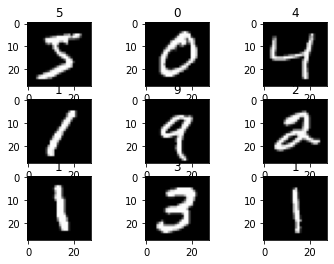

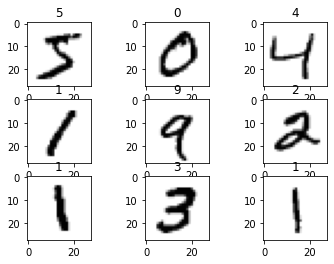

In [6]:
# Example of images in dataset
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_data[i,:,:], cmap='gray')
    plt.title(train_data_labels[i])
plt.show()

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_data[i,:,:], cmap=plt.cm.binary)
    plt.title(train_data_labels[i])
plt.show()

### Default are black images on white surface

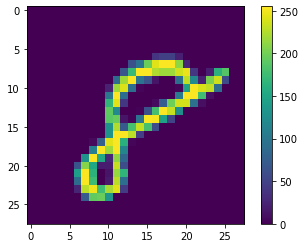

In [7]:
plt.figure()
plt.imshow(train_data[59999]) # Enter value between 0 and 59.999
plt.colorbar()
plt.grid(False)
plt.show()

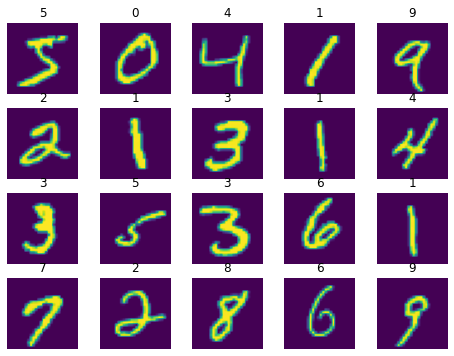

In [8]:
plt.figure(figsize=(8, 6))
for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(x_train[i,:,:])
    plt.title(y_train[i])
    plt.axis("off")

In [9]:
print('Train: X=%s, Y=%s' % (x_train.shape, y_train.shape))
print('Test:  x=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), Y=(60000,)
Test:  x=(10000, 28, 28), y=(10000,)


## Open custom image from dataset
### Change the color (cmap='colour_filter') where colour_filter is available color

0


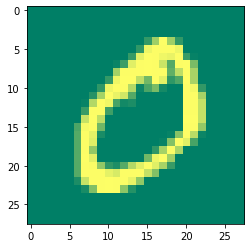

In [10]:
image_index = 1 # Enter value between 0 and 59.999
print(train_data_labels[image_index])
#plt.imshow(train_data[image_index], cmap='Accent_r')
#plt.imshow(train_data[image_index], cmap='flag')
plt.imshow(train_data[image_index], cmap='summer')
#plt.imshow(train_data[image_index], cmap='winter')
#plt.imshow(train_data[image_index], cmap='Dark2')

In [11]:
input_shape = (28, 28, 1)
def ponastaviPodatke(train_data, train_data_labels, test_data, test_data_labels):
    x_train, y_train, x_test, y_test = train_data, train_data_labels, test_data, test_data_labels
    # 4-dimensional array to work with Keras
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    # Float values, standardization
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # Divide with 255 (RGB values)
    # Normalization - values in array between [0,1]
    x_train /= 255
    x_test /= 255
    return x_train, y_train, x_test, y_test

In [12]:
# Importan libraries, modules for tensorflow, Keras, layers etc.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import SGD
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
import time
import pandas as pd
import cv2 as cv
from IPython.core.display import Image, display

## Assemble a model

In [13]:
# Assemble a model
def AssembleKFoldModel():
    modelKFold = Sequential()
    modelKFold.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    modelKFold.add(MaxPooling2D((2, 2)))
    modelKFold.add(Flatten()) # Sploščitev slojev, za boljšo povezavo med njimi
    modelKFold.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    modelKFold.add(Dense(10, activation='softmax'))
    return modelKFold

# Optimizators

In [14]:
# Add optimizer
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)

modelKFold = AssembleKFoldModel()
modelKFold.summary()

# Combile model
modelKFold.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [15]:
# K-Fold cross validation
n_folds = 5 # Enter a "custom" value
epochsKFold = 2 # Enter a "custom" value
scores = list()
histories = list()

x_train, y_train, x_test, y_test = ponastaviPodatke(train_data, train_data_labels, test_data, test_data_labels)

Ytrain = tf.keras.utils.to_categorical(y_train)
Ytest = tf.keras.utils.to_categorical(y_test)

kfold = KFold(n_folds, shuffle=True, random_state=1)
# Measure time of training
StartTime = time.time()
# train, test split, K-Fold validation
for train_x, test_x in kfold.split(x_train):
    trainX = x_train[train_x]
    trainY = Ytrain[train_x]
    testX = x_train[test_x]
    testY = Ytrain[test_x]
    # Train model in for loop for K_Fold
    history = modelKFold.fit(trainX, trainY, epochs=epochsKFold, batch_size=32, validation_data=(testX, testY), verbose=0)
    _, acc = modelKFold.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)

print('Accuracy: mean=%.3f std=%.3f, n_folds=%d' % (mean(scores)*100, std(scores)*100, n_folds))

EndTime = time.time()
duration = EndTime - StartTime
results_metrics = {'Name': ['KFoldModel'], 'Accuracy': mean(scores)*100, 'Loss': mean(history.history['loss'])*100, 'Time': [duration], 'Conv2D':[1]}

df = pd.DataFrame(data=results_metrics)
df

> 97.587
> 98.383
Točnost - accuracy: mean=97.985 std=0.398, n_folds=2


,Ime,Tocnost,Loss,Cas,Conv2D
0,ModelKFold,97.984999,6.504374,60.488861,1


## Model.fit
Keras saves key parameters when calling .fit() function.
* print(history.history.keys())

Default includes:
*   acc
*   loss
*   val_acc
*   val_loss

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


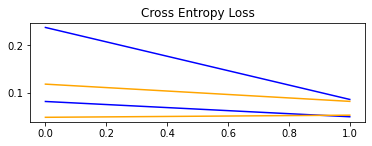

In [17]:
for i in range(len(histories)):
	# Plot loss
	plt.subplot(2, 1, 1)
	plt.title('Cross Entropy Loss')
	plt.plot(histories[i].history['loss'], color='blue', label='train')
	plt.plot(histories[i].history['val_loss'], color='orange', label='test')

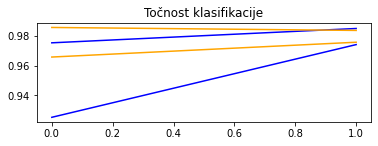

In [18]:
for i in range(len(histories)):
	# Plot accuracy
	plt.subplot(2, 1, 2)
	plt.title('Accuracy of classification')
	plt.plot(histories[i].history['accuracy'], color='blue', label='train')
	plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')

## Predict custom image from dataset

Napovedana: 8 Dejanska: 8


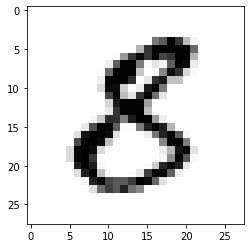

In [19]:
digit_number = 1234 # Enter number between [0-9999]
plt.imshow(x_test[digit_number].reshape(28, 28),cmap='Greys')
pred = modelKFold.predict(x_test[digit_number].reshape(1, 28, 28, 1)) # Predict a digit
print('Predicted: ' + str(pred.argmax()) + ' Actual: ' + str(y_test[digit_number])) # Print predicted and actual value

### Set epochs for all next model in this IPYNB

In [21]:
epochs = 3 # Set "custom" number (bigger the number, longer the duration time)
index_columns = ["ModelName", "Accuracy", "Loss", "Time(seconds)", "Conv2D"]

In [22]:
x_train, y_train, x_test, y_test = ponastaviPodatke(train_data, train_data_labels, test_data, test_data_labels)

firstModel = Sequential()
firstModel.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
firstModel.add(MaxPooling2D(pool_size=(2, 2)))
firstModel.add(Flatten())
firstModel.add(Dense(128, activation=tf.nn.relu))
firstModel.add(Dropout(0.2))
firstModel.add(Dense(10,activation=tf.nn.softmax))

firstModel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

StartTime = time.time() # Timer - start time

history2 = firstModel.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test), verbose=0) # Save fit data

accuracy2 = history2.history['accuracy']
loss2 = history2.history['loss'] # in loss modela

EndTime = time.time() # Time at end
duration = EndTime - StartTime # Start time - end time = duration

add_line = {'ModelName': 'FirstModel', 'Accuracy': mean(accuracy2)*100, 'Loss': mean(loss2)*100, 'Time(seconds)': duration, 'Conv2D': 1}
add_line_series = pd.Series(data=add_line, index=index_columns)
df = pd.concat([df, add_line_series])  # Dodajanje vrstice v dataframe
df # print df

,Ime,Tocnost,Loss,Cas,Conv2D
0,ModelKFold,97.984999,6.504374,60.488861,1
1,ModelPrvi,96.508334,11.428584,56.185571,1


In [23]:
predictions = firstModel.predict(x_test)
n = 2 # Enter value between [0 in 9.999]
print("Predicted: " + str(np.argmax(predictions[n])) + " Actual: " + str(y_test[n]))

Napovedana: 1 Dejanska: 1


In [24]:
print("Loss and Accuracy of 'FirstModel'")
firstModel.evaluate(x_test, y_test)

Loss in Točnost modela 'ModelPrvi'
313/313 [==============================] - 1s 4ms/step - loss: 0.0557 - accuracy: 0.9825


[0.05565632879734039, 0.9825000166893005]

## Batch Normalization

In [25]:
from keras.layers import BatchNormalization
def UstvariModelKFoldBatch():
    # Create a neural network
    ModelKFoldBatch = Sequential()
    ModelKFoldBatch.add(BatchNormalization())
    ModelKFoldBatch.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
    ModelKFoldBatch.add(MaxPooling2D((2, 2)))
    ModelKFoldBatch.add(Flatten())
    ModelKFoldBatch.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    ModelKFoldBatch.add(BatchNormalization())
    ModelKFoldBatch.add(Dense(10, activation='softmax'))
    return ModelKFoldBatch

In [26]:
ModelKFoldBatch = UstvariModelKFoldBatch()
opt = SGD(lr=0.01, momentum=0.9)
ModelKFoldBatch.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x_train, y_train, x_test, y_test = ponastaviPodatke(train_data, train_data_labels, test_data, test_data_labels)

StartTime = time.time()
history3 = ModelKFoldBatch.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test), verbose=0)
accuracy3 = history3.history['accuracy']
loss3 = history3.history['loss']

EndTime = time.time()
duration = EndTime - StartTime

add_line = {'ModelName': 'modelKFoldBatch', 'Accuracy': mean(accuracy3)*100, 'Loss': mean(loss3)*100, 'Time(seconds)': duration, 'Conv2D': 1}
add_line_series = pd.Series(data=add_line, index=index_columns)
df = pd.concat([df, add_line_series])  # Dodajanje vrstice v dataframe
df

,Ime,Tocnost,Loss,Cas,Conv2D
0,ModelKFold,97.984999,6.504374,60.488861,1
1,ModelPrvi,96.508334,11.428584,56.185571,1
2,modelKFoldBatch,97.338889,8.715230,71.200647,1


In [27]:
def UstvariModel2xConv():
	model2Conv = Sequential()
	model2Conv.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model2Conv.add(MaxPooling2D((2, 2)))
	model2Conv.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model2Conv.add(MaxPooling2D((2, 2)))
	model2Conv.add(Flatten())
	model2Conv.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model2Conv.add(Dense(10, activation='softmax'))
	return model2Conv

In [28]:
model2Conv = UstvariModel2xConv()
opt = SGD(lr=0.01, momentum=0.9)
model2Conv.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x_train, y_train, x_test, y_test = ponastaviPodatke(train_data, train_data_labels, test_data, test_data_labels)

StartTime = time.time()

history4 = model2Conv.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test), verbose=0)
accuracy4 = history4.history['accuracy']
loss4 = history4.history['loss']

EndTime = time.time()
duration = EndTime - StartTime

add_line = {'ModelName': 'model2xConv', 'Accuracy': mean(accuracy4)*100, 'Loss': mean(loss4)*100, 'Time(seconds)': duration, 'Conv2D': 2}
add_line_series = pd.Series(data=add_line, index=index_columns)
df = pd.concat([df, add_line_series])  # Dodajanje vrstice v dataframe
df

,Ime,Tocnost,Loss,Cas,Conv2D
0,ModelKFold,97.984999,6.504374,60.488861,1
1,ModelPrvi,96.508334,11.428584,56.185571,1
2,modelKFoldBatch,97.338889,8.715230,71.200647,1
3,model2xConv,97.763888,7.219691,84.510826,2


In [31]:
def UstvariModelIzboljsan():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	return model

In [32]:
modelIzboljsan = UstvariModelIzboljsan()
opt = SGD(lr=0.01, momentum=0.9)
modelIzboljsan.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x_train, y_train, x_test, y_test = ponastaviPodatke(train_data, train_data_labels, test_data, test_data_labels)

StartTime = time.time()

history5 = modelIzboljsan.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test), verbose=0)
accuracy5 = history5.history['accuracy']
loss5 = history5.history['loss']

EndTime = time.time()
duration = EndTime - StartTime

add_line = {'ModelName': 'model3xConv', 'Accuracy': mean(accuracy5)*100, 'Loss': mean(loss5)*100, 'Time(seconds)': duration, 'Conv2D': 3}
add_line_series = pd.Series(data=add_line, index=index_columns)
df = pd.concat([df, add_line_series])  # Dodajanje vrstice v dataframe
df

,Ime,Tocnost,Loss,Cas,Conv2D
0,ModelKFold,97.984999,6.504374,60.488861,1
1,ModelPrvi,96.508334,11.428584,56.185571,1
2,modelKFoldBatch,97.338889,8.715230,71.200647,1
3,model2xConv,97.763888,7.219691,84.510826,2
4,model3xConv,97.952221,6.520545,126.804663,3


In [33]:
def UstvariModel4xConv():
	Model4xConv = Sequential()
	Model4xConv.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	Model4xConv.add(MaxPooling2D((2, 2)))
	Model4xConv.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	Model4xConv.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	Model4xConv.add(MaxPooling2D((2, 2)))
	Model4xConv.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	Model4xConv.add(MaxPooling2D((2, 2)))
	Model4xConv.add(Flatten())
	Model4xConv.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	Model4xConv.add(Dense(10, activation='softmax'))
	return Model4xConv

In [34]:
Model4xConv = UstvariModel4xConv()
opt = SGD(lr=0.01, momentum=0.9)
Model4xConv.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x_train, y_train, x_test, y_test = ponastaviPodatke(train_data, train_data_labels, test_data, test_data_labels)

StartTime = time.time()

history6 = Model4xConv.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_data=(x_test, y_test), verbose=0)
accuracy6 = history6.history['accuracy']
loss6 = history6.history['loss']

EndTime = time.time()
duration = EndTime - StartTime

add_line = {'ModelName': 'model4xConv', 'Accuracy': mean(accuracy6)*100, 'Loss': mean(loss6)*100, 'Time(seconds)': duration, 'Conv2D': 4}
add_line_series = pd.Series(data=add_line, index=index_columns)
df = pd.concat([df, add_line_series])  # Dodajanje vrstice v dataframe
df

,Ime,Tocnost,Loss,Cas,Conv2D
0,ModelKFold,97.984999,6.504374,60.488861,1
1,ModelPrvi,96.508334,11.428584,56.185571,1
2,modelKFoldBatch,97.338889,8.715230,71.200647,1
3,model2xConv,97.763888,7.219691,84.510826,2
4,model3xConv,97.952221,6.520545,126.804663,3
5,model4xConv,97.628335,7.685824,131.338429,4


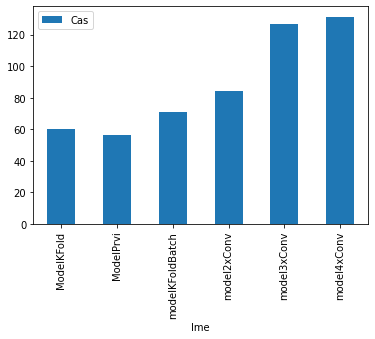

In [35]:
df.plot(kind='bar', x='ModelName', y='Time(seconds)')

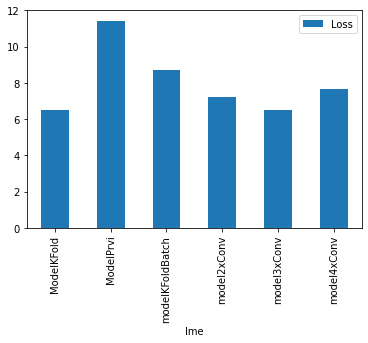

In [36]:
df.plot(kind='bar', x='ModelName', y='Loss')

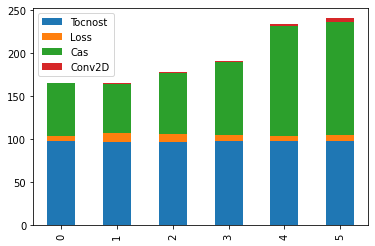

In [37]:
df.plot(kind='bar', stacked=True)

# Uporaba Scikit Learn
Spet imamo veliko različnih možnosti nalaganja podatkov, nek manjši digit dataset ima tudi sklearn, ima pa okoli 1700 števk velikosti 8x8 pikslov.
Da bo primerjava realnejša, raje uporabim datoteko, ki jo že imam na disku.
## Naslednja metoda naredi podobno kot naša read_file()

Vendar na malenkost drugačen način zapiše datoteke v spremenljivke, zmanjša dimenzijo arraya, kar omogoči uporabo sk-learn knjižnice. Tukaj namreč potrebujemo maksimalno 2D array, pri nevronskih mrežah pa je bilo dimenzij več 

In [38]:
from struct import unpack
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

## Učna in testna množica
sedaj sem mali x in y zamenjal z velikim, podatki v množici so v bistvu enaki, le na drugačen način zabeleženi

In [39]:
X_train, Y_train = loadmnist('train/train-images.idx3-ubyte', 'train/train-labels.idx1-ubyte')
X_test, Y_test = loadmnist('test/t10k-images.idx3-ubyte', 'test/t10k-labels.idx1-ubyte')

In [40]:
from sklearn.linear_model import LogisticRegression
#solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
logisticRegr = LogisticRegression(solver = 'lbfgs')

StartTime = time.time()

logisticRegr.fit(X_train, Y_train)

accuracy7 = logisticRegr.score(X_test, Y_test)

EndTime = time.time()
duration = EndTime - StartTime

add_line = {'ModelName': 'LogisticRegression', 'Accuracy': mean(accuracy7)*100, "Loss": 0, 'Time(seconds)': duration, 'Conv2D': 0}
add_line_series = pd.Series(data=add_line, index=index_columns)
df = pd.concat([df, add_line_series])  # Dodajanje vrstice v dataframe
df.head(7)

,Ime,Tocnost,Loss,Cas(sekunde),Conv2D
0,ModelKFold,97.984999,6.504374,60.488861,1
1,ModelPrvi,96.508334,11.428584,56.185571,1
2,modelKFoldBatch,97.338889,8.715230,71.200647,1
3,model2xConv,97.763888,7.219691,84.510826,2
4,model3xConv,97.952221,6.520545,126.804663,3
5,model4xConv,97.628335,7.685824,131.338429,4
6,LogisticRegression,92.550000,NaN,15.590416,0


Text(0.5, 1.0, 'Accuracy Score: 1')

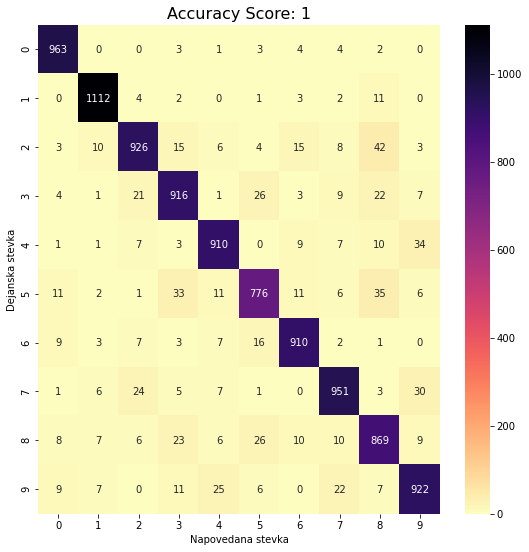

In [41]:
from sklearn import metrics
import seaborn as sns
napovej = logisticRegr.predict(X_test)
cm = metrics.confusion_matrix(Y_test, napovej)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", cmap = 'magma_r')
plt.xlabel('Predicted digit')
plt.ylabel('Actual digit')
all_sample_title = 'Accuracy Score: {:.0f}'.format(accuracy7)
plt.title(all_sample_title, size = 16)

## Interesting fact
Show only wrongly predicted digits

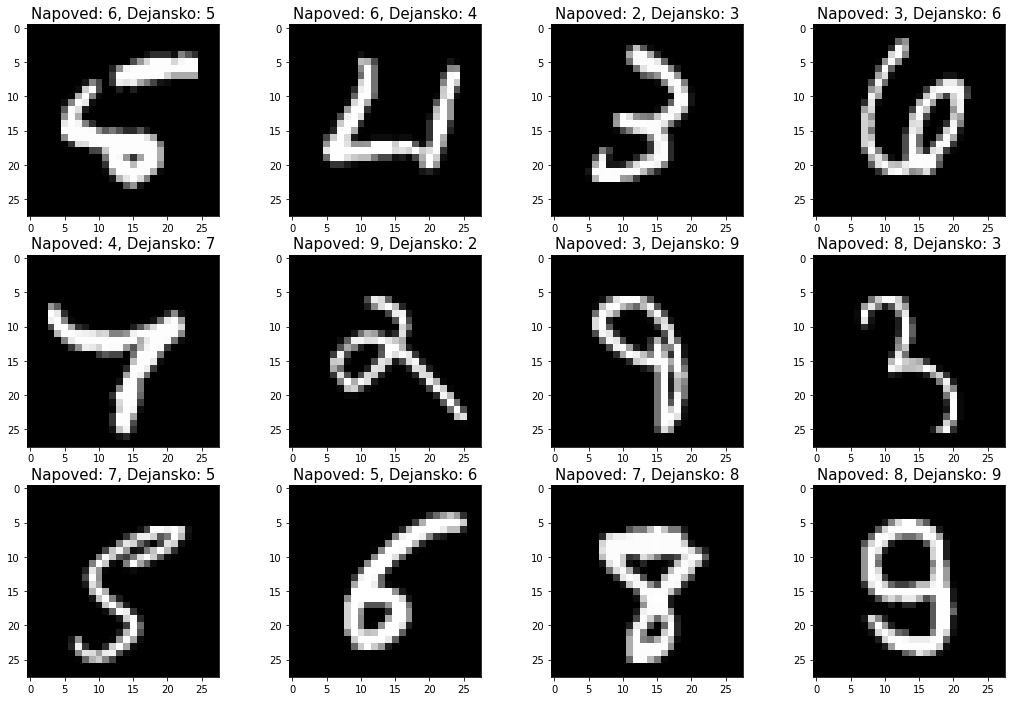

In [42]:
i = 0
nepravilne = []
for label, predict in zip(Y_test, napovej):
    if label != predict: 
        nepravilne.append(i)
    i = i+1

plt.figure(figsize=(18,12))
for plotIndex, badIndex in enumerate(nepravilne[0:12]): # s for loop through first 0-11 (12)
    plt.subplot(3, 4, plotIndex + 1) # subplot - more smaller plots
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray) # 28,28 is the image size in pixels
    plt.title('Prediction: {}, Actual: {}'.format(napovej[badIndex], Y_test[badIndex]), fontsize = 15) # Add title to image to show predicted and actual value

## Comment
Wrongly predicted iamges are really badly written

In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=0)

StartTime = time.time()

pac.fit(X_train, Y_train)

accuracy8 = pac.score(X_test, Y_test)

EndTime = time.time()
duration = EndTime - StartTime

add_line = {'ModelName': 'PassiveAggressiveClassifier', 'Accuracy': mean(accuracy8)*100, "Loss": 0, 'Time(seconds)': duration, 'Conv2D': 0}
add_line_series = pd.Series(data=add_line, index=index_columns)
df = pd.concat([df, add_line_series])  # Dodajanje vrstice v dataframe

In [44]:
from sklearn.linear_model import LarsCV
lCV = LarsCV()

StartTime = time.time()

lCV.fit(X_train, Y_train)

accuracy9 = lCV.score(X_test, Y_test)

EndTime = time.time()
duration = EndTime - StartTime

add_line = {'Name': 'LarsCV', 'Accuracy': mean(accuracy9)*100, "Loss": 0, 'Time(seconds)': duration, 'Conv2D': 0}
add_line_series = pd.Series(data=add_line, index=index_columns)
df = pd.concat([df, add_line_series])  # Dodajanje vrstice v dataframe

In [45]:
from sklearn.linear_model import RidgeCV
rCV = RidgeCV()

StartTime = time.time()

rCV.fit(X_train, Y_train)

accuracy10 = rCV.score(X_test, Y_test)

EndTime = time.time()
duration = EndTime - StartTime

add_line = {'ModelName': 'RidgeCV', 'Accuracy': mean(accuracy10)*100, "Loss": 0, 'Time(seconds)': duration, 'Conv2D': 0}
add_line_series = pd.Series(data=add_line, index=index_columns)
df = pd.concat([df, add_line_series])  # Dodajanje vrstice v dataframe

In [46]:
from sklearn.linear_model import ElasticNetCV
enCV = ElasticNetCV()

StartTime = time.time()

enCV.fit(X_train, Y_train)

accuracy11 = enCV.score(X_test, Y_test)

EndTime = time.time()
duration = EndTime - StartTime

add_line = {'Name': 'ElasticNetCV', 'Accuracy': mean(accuracy11)*100, "Loss": 0, 'Time(seconds)': duration, 'Conv2D': 0}
add_line_series = pd.Series(data=add_line, index=index_columns)
df = pd.concat([df, add_line_series])  # Dodajanje vrstice v dataframe

In [47]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()

StartTime = time.time()

br.fit(X_train, Y_train)

accuracy12 = br.score(X_test, Y_test)

EndTime = time.time()
duration = EndTime - StartTime

add_line = {'ModelName': 'BayesianRidge', 'Accuracy': mean(accuracy12)*100, "Loss": 0, 'Time(seconds)': duration, 'Conv2D': 0}
add_line_series = pd.Series(data=add_line, index=index_columns)
df = pd.concat([df, add_line_series])  # Dodajanje vrstice v dataframe
df.tail(6)

,Ime,Tocnost,Loss,Cas(sekunde),Conv2D
6,LogisticRegression,92.550000,NaN,15.590416,0
7,PassiveAggressiveClassifier,88.110000,NaN,18.804281,0
8,LarsCV,32.567400,NaN,12.156604,0
9,RidgeCV,62.385544,NaN,7.935809,0
10,ElasticNetCV,62.613345,NaN,26.761708,0
11,BayesianRidge,62.618886,NaN,7.320887,0


# Ending

### Why 3 epoche?

Elbow method - best accuracy for the fastest training time.

### Explanation
ModelKFold uses KFold valdiation, modelKFoldBatch is the same model with Batch-validation added but no Cross-Validation.

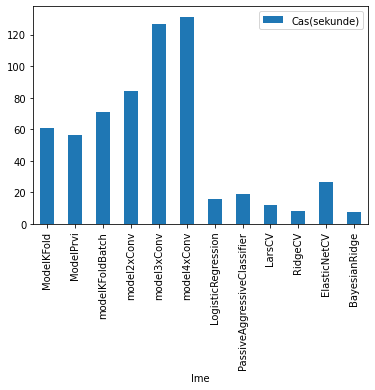

In [48]:
df.plot(kind='bar', x='ModelName', y='Time(seconds)')

### CNN's accuracy are really close to one another. Best score is from SK-Learn's implementation of Logistic Regression.

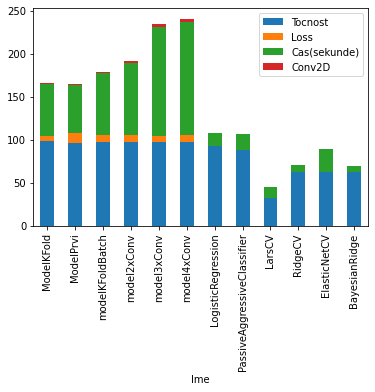

In [59]:
df.plot(kind='bar', stacked=True, x='ModelName')

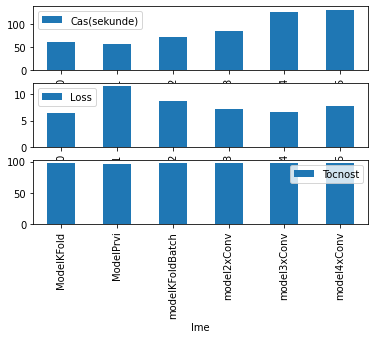

In [57]:
# Plot shows accuracies nad losses of neural networks trained and tested in this ipynb
fig, axes = plt.subplots(nrows=3, ncols=1)
df.iloc[:6].plot(ax=axes[0], kind='bar', y='Time(seconds)')
df.iloc[:6].plot(ax=axes[1], kind='bar', y='Loss')
df.iloc[:6].plot(ax=axes[2], kind='bar', x='ModelName', y='Accuracy')

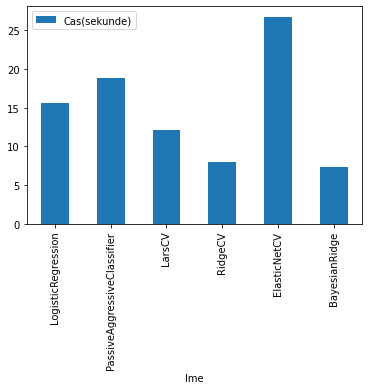

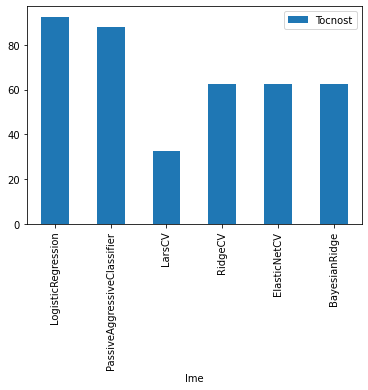

In [51]:
# Plot of accuracies from SK-Learn algorithms
df.iloc[6:].plot(kind='bar', x='ModelName', y='Time(seconds)')
df.iloc[6:].plot(kind='bar', x='ModelName', y='Accuracy')

# Own Handwritten digit recognition


In [52]:
def napovejRocnoNapisane(s):
    file = "hand-written-digits/"+str(s)+".png" # open file
    image = cv.imread(file, cv.IMREAD_GRAYSCALE) # convert to grayscale
    image = image.astype('float32') # change type to float
    image = image.reshape(1, 28, 28) # shape of image - same as in MNIST
    image = 255-image # invert colors
    image = image/255 # Standardization - divide rgb values with 255
    return image

Števka 0


Števka 1


Števka 2


Števka 3


Števka 4


Števka 5


Števka 6


Števka 7


Števka 8


Števka 9


Sledijo napovedi


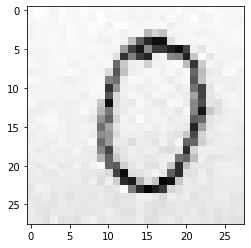

Napovedana: 0 Dejanska: 0


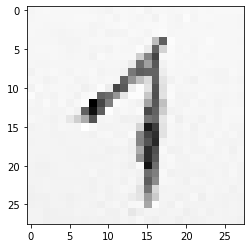

Napovedana: 4 Dejanska: 1


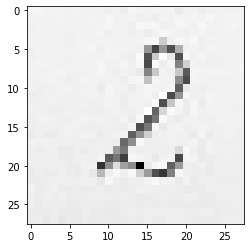

Napovedana: 2 Dejanska: 2


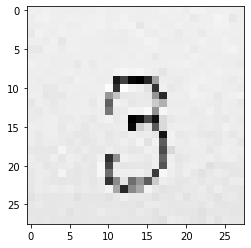

Napovedana: 3 Dejanska: 3


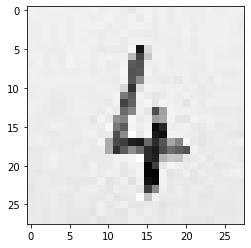

Napovedana: 4 Dejanska: 4


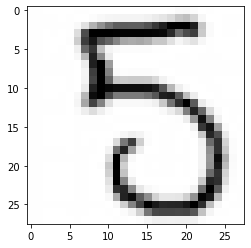

Napovedana: 5 Dejanska: 5


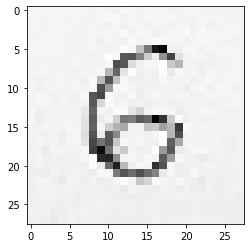

Napovedana: 6 Dejanska: 6


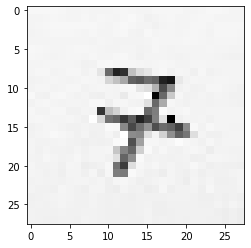

Napovedana: 7 Dejanska: 7


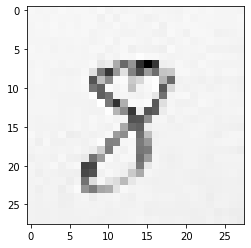

Napovedana: 8 Dejanska: 8


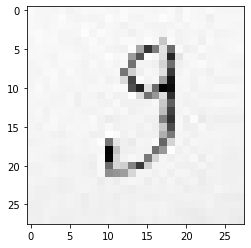

Napovedana: 2 Dejanska: 9


In [53]:
for s in range (10):
    print("Digit "+str(s))
    display(Image('hand-written-digits/'+str(s)+'.png', format='png'))
    
print("Predictions")

for s in range (10):
    image = napovejRocnoNapisane(str(s))
    plt.imshow(image.reshape(28, 28),cmap='Greys')
    plt.show()
    pred = modelKFold.predict(image.reshape(1, 28, 28, 1)) # Predict a digit
    print('Predicted: ' + str(pred.argmax()) + ' Actual: ' + str(s)) # Print predicted and value